In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset-digit-recognizer/mnist_submission.csv
/kaggle/input/mnist-dataset-digit-recognizer/__results__.html
/kaggle/input/mnist-dataset-digit-recognizer/__output__.json
/kaggle/input/mnist-dataset-digit-recognizer/custom.css


In [5]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [6]:
df.shape

(42000, 785)

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33332,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


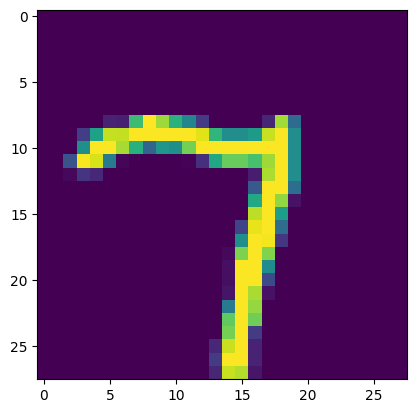

In [11]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[33332,1:].values.reshape(28,28))

In [13]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.020292520523071


In [18]:
#Calculating Accuracy Before PCA with 784 input features
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9648809523809524


# Starting PCA

In [19]:
# Step 1
# Mean Centring using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Step 2
# Applying PCA and choosing Principle Components
# Calculating Co Variance, Eigen Values, Eigen Vectors is 
# taken care by the algorithm

from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [27]:
# Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621, 20.85344791, 18.14891878,
       15.8529825 , 13.871081  , 12.48058958, 11.02794224, 10.09582465,
        9.63317791,  8.62785804,  8.06303044,  7.89511505,  7.44167722,
        7.17032535,  6.73265858,  6.62742534,  6.41497529,  6.25805992,
        5.90490734,  5.76515828,  5.52077103,  5.32001723,  5.18299588,
        4.93422016,  4.90630811,  4.7178574 ,  4.49798581,  4.43120954,
        4.32556102,  4.23447186,  4.10275576,  4.06686027,  4.02296559,
        3.84033765,  3.81815671,  3.71212809,  3.60836416,  3.4712929 ,
        3.42687824,  3.38702647,  3.28989015,  3.22542189,  3.21547794,
        3.15473146,  3.12471529,  3.10224152,  3.05547772,  3.03308805,
        2.9595946 ,  2.93693203,  2.86259084,  2.82041927,  2.79196157,
        2.76551017,  2.71602837,  2.68439354,  2.63548703,  2.62143962,
        2.5554483 ,  2.52817547,  2.47837472,  2.42620863,  2.40834742,
        2.3661883 ,  2.33201546,  2.31868592,  2.27405687,  2.23

In [28]:
# Eigen Vectors
pca.components_

array([[ 3.19502840e-18,  1.28361664e-18, -6.30929019e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.83040644e-17,  2.07925406e-17, -5.91568093e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.15610442e-17,  3.71779660e-18,  2.22369423e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.07063502e-17,  3.19398147e-17, -3.32813778e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.27475596e-17, -1.98269071e-17, -1.29024072e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.02239178e-17, -1.86097895e-17,  3.40701967e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [30]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146912, 0.01123027, 0.01058529,
       0.01019931, 0.00957675, 0.00942707, 0.00912487, 0.00890167,
       0.00839933, 0.00820055, 0.00785293, 0.00756737, 0.00737246,
       0.0070186 , 0.00697889, 0.00671083, 0.00639808, 0.0063031 ,
       0.00615282, 0.00602325, 0.00583589, 0.00578484, 0.0057224 ,
       0.00546262, 0.00543107, 0.00528025, 0.00513266, 0.00493768,
       0.0048745 , 0.00481782, 0.00467965, 0.00458795, 0.0045738 ,
       0.00448739, 0.0044447 , 0.00441273, 0.00434621, 0.00431436,
       0.00420982, 0.00417759, 0.00407184, 0.00401186, 0.00397138,
       0.00393375, 0.00386337, 0.00381837, 0.0037488 , 0.00372882,
       0.00363495, 0.00359616, 0.00352532, 0.00345112, 0.00342571,
       0.00336574, 0.00331714, 0.00329817, 0.00323469, 0.00318085,
       0.00316118, 0.00308414, 0.00306588, 0.0030203 , 0.00299

In [22]:
X_train_trf.shape

(33600, 100)

In [25]:
# Reapplying KNN on the reduced features
knn.fit(X_train_trf,y_train)
y_pred1 = knn.predict(X_test_trf)
print(accuracy_score(y_test,y_pred1))

0.9538095238095238
